# Bush vs Obama Iraq Speech Sentiment Analysis

In this project, I use several popular libraries to scrape webpages for text, clean the resultant text, export the text into both seperate files and Pandas dataframes, and finally dissect the sentiment of the two presidents' speeches regarding "winning" the war in Iraq at different time frames.  It is evident here that despite differing political affiliations, both Obama and Bush echoed similar sentiment in withdrawing from the Iraq war.  

This project showcase proficiency with Pandas, Matplotlib, sklearn, newspaper and textblob libraries.  

In [68]:
# Import dependencies and required magics

import requests        #import from web
from bs4 import BeautifulSoup      #clean up text
from textblob import TextBlob      #basic NLP, install first
from newspaper import Article
from pathlib import Path    #for quick import of text file for NLP
import pandas as pd
import matplotlib.pyplot as plt
from plotly import express as px
import matplotlib as mpl
import nltk
from sklearn.metrics import r2_score

#Magics
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## George W Bush Mission Accomplished Speech to Sentiment DF Code

In [6]:
#Set the url
url = 'https://georgewbush-whitehouse.archives.gov/news/releases/2003/05/20030501-15.html'
event = 'GWBushVictory'   #will use in file names

#Get the text of the speech
article = Article(url)
article.download()
article.parse()
text = article.text   # saves to an object for later use

#print the speech
text

'For Immediate Release\n\nOffice of the Press Secretary\n\nMay 1, 2003\n\nPresident Bush Announces Major Combat Operations in Iraq Have Ended\n\nRemarks by the President from the USS Abraham Lincoln\n\nAt Sea Off the Coast of San Diego, California\n\nTHE PRESIDENT: Thank you all very much. Admiral Kelly, Captain Card, officers and sailors of the USS Abraham Lincoln, my fellow Americans: Major combat operations in Iraq have ended. In the battle of Iraq, the United States and our allies have prevailed. (Applause.) And now our coalition is engaged in securing and reconstructing that country.\n\nIn this battle, we have fought for the cause of liberty, and for the peace of the world. Our nation and our coalition are proud of this accomplishment -- yet, it is you, the members of the United States military, who achieved it. Your courage, your willingness to face danger for your country and for each other, made this day possible. Because of you, our nation is more secure. Because of you, the t

In [7]:
#write the text to a file

with open('speech.txt', 'w') as f:
    f.writelines(text)

with open('speech.txt', 'r') as f:
    for cnt, line in enumerate(f):
        print(f'Line {cnt}: {line}')
        
with open('speech.txt', 'r') as f:
    speech = f.readlines()

tmp = []
speaker = []
time = []
words = []

for cnt, line in enumerate(speech):
    if cnt % 2 == 0:
        tmp.append(line.rstrip())   #temp list of just the text lines 0,2
        
for i in range(0,len(tmp),2):
    speaker.append(tmp[i].split(': ')[0])  #split speaker line into 2 parts
    time.append(tmp[i].split(': ')[1])
    words.append(tmp[i+1])    #words from speaker

Line 0: For Immediate Release

Line 1: 

Line 2: Office of the Press Secretary

Line 3: 

Line 4: May 1, 2003

Line 5: 

Line 6: President Bush Announces Major Combat Operations in Iraq Have Ended

Line 7: 

Line 8: Remarks by the President from the USS Abraham Lincoln

Line 9: 

Line 10: At Sea Off the Coast of San Diego, California

Line 11: 

Line 12: THE PRESIDENT: Thank you all very much. Admiral Kelly, Captain Card, officers and sailors of the USS Abraham Lincoln, my fellow Americans: Major combat operations in Iraq have ended. In the battle of Iraq, the United States and our allies have prevailed. (Applause.) And now our coalition is engaged in securing and reconstructing that country.

Line 13: 

Line 14: In this battle, we have fought for the cause of liberty, and for the peace of the world. Our nation and our coalition are proud of this accomplishment -- yet, it is you, the members of the United States military, who achieved it. Your courage, your willingness to face danger f

IndexError: list index out of range

In [8]:
#Print key attributes of the speech
print("Title: ", article.title)   #retrieves the title
print("Authors: ", article.authors)   #creates a list of authors; no authors on this page since GWB made the speech
print("Publication Date: ", article.publish_date)  #no publish date on this web-page
print("First Image:", article.top_image)  #retrieves the top image on the page
print("Video Links:", article.movies)  #creates a list of video links; none on this page

article.nlp() 

print("KeyWords: ", article.keywords)   #creates a list of key words
print()
print("Summary: ", article.summary)  #creates summary of article


Title:  President Bush Announces Major Combat Operations in Iraq Have Ended
Authors:  []
Publication Date:  2003-05-20 00:00:00
First Image: https://georgewbush-whitehouse.archives.gov/news/releases/2003/05/images/20030501-15_d050103-2-322v.jpg
Video Links: []
KeyWords:  ['iraq', 'president', 'war', 'terrorist', 'world', 'united', 'terrorists', 'bush', 'states', 'freedom', 'military', 'nation', 'operations', 'announces', 'major', 'ended', 'combat']

Summary:  For Immediate ReleaseOffice of the Press SecretaryMay 1, 2003President Bush Announces Major Combat Operations in Iraq Have EndedRemarks by the President from the USS Abraham LincolnAt Sea Off the Coast of San Diego, CaliforniaTHE PRESIDENT: Thank you all very much.
Admiral Kelly, Captain Card, officers and sailors of the USS Abraham Lincoln, my fellow Americans: Major combat operations in Iraq have ended.
In the battle of Iraq, the United States and our allies have prevailed.
Our nation and our coalition are proud of this accompli

In [9]:
#set the data variable equal to the open file
with open('speech.txt', 'r') as file:
    data = file.read().replace('\n', '')

#set the blob variable equal to the textblob of the open file
blob = TextBlob(data)

#print the blob
blob

TextBlob("For Immediate ReleaseOffice of the Press SecretaryMay 1, 2003President Bush Announces Major Combat Operations in Iraq Have EndedRemarks by the President from the USS Abraham LincolnAt Sea Off the Coast of San Diego, CaliforniaTHE PRESIDENT: Thank you all very much. Admiral Kelly, Captain Card, officers and sailors of the USS Abraham Lincoln, my fellow Americans: Major combat operations in Iraq have ended. In the battle of Iraq, the United States and our allies have prevailed. (Applause.) And now our coalition is engaged in securing and reconstructing that country.In this battle, we have fought for the cause of liberty, and for the peace of the world. Our nation and our coalition are proud of this accomplishment -- yet, it is you, the members of the United States military, who achieved it. Your courage, your willingness to face danger for your country and for each other, made this day possible. Because of you, our nation is more secure. Because of you, the tyrant has fallen, a

In [10]:
#overall polarity and subjectivity
print('Polarity -1 +1,  Subjectivity 0 1')
print('=================================')
print(f'Polarity: \t{blob.polarity:.3f}')
print(f'Subjectivity:\t{blob.subjectivity:.3f}')

Polarity -1 +1,  Subjectivity 0 1
Polarity: 	0.101
Subjectivity:	0.512


In [11]:
#print overall sentiment and polarity of the speech
blob.sentiment

Sentiment(polarity=0.10143851479985935, subjectivity=0.5121981216729116)

In [12]:
#print the words in the blob
blob.words

WordList(['For', 'Immediate', 'ReleaseOffice', 'of', 'the', 'Press', 'SecretaryMay', '1', '2003President', 'Bush', 'Announces', 'Major', 'Combat', 'Operations', 'in', 'Iraq', 'Have', 'EndedRemarks', 'by', 'the', 'President', 'from', 'the', 'USS', 'Abraham', 'LincolnAt', 'Sea', 'Off', 'the', 'Coast', 'of', 'San', 'Diego', 'CaliforniaTHE', 'PRESIDENT', 'Thank', 'you', 'all', 'very', 'much', 'Admiral', 'Kelly', 'Captain', 'Card', 'officers', 'and', 'sailors', 'of', 'the', 'USS', 'Abraham', 'Lincoln', 'my', 'fellow', 'Americans', 'Major', 'combat', 'operations', 'in', 'Iraq', 'have', 'ended', 'In', 'the', 'battle', 'of', 'Iraq', 'the', 'United', 'States', 'and', 'our', 'allies', 'have', 'prevailed', 'Applause', 'And', 'now', 'our', 'coalition', 'is', 'engaged', 'in', 'securing', 'and', 'reconstructing', 'that', 'country.In', 'this', 'battle', 'we', 'have', 'fought', 'for', 'the', 'cause', 'of', 'liberty', 'and', 'for', 'the', 'peace', 'of', 'the', 'world', 'Our', 'nation', 'and', 'our', 'c

In [13]:
#print the sentences in the blob
blob.sentences

[Sentence("For Immediate ReleaseOffice of the Press SecretaryMay 1, 2003President Bush Announces Major Combat Operations in Iraq Have EndedRemarks by the President from the USS Abraham LincolnAt Sea Off the Coast of San Diego, CaliforniaTHE PRESIDENT: Thank you all very much."),
 Sentence("Admiral Kelly, Captain Card, officers and sailors of the USS Abraham Lincoln, my fellow Americans: Major combat operations in Iraq have ended."),
 Sentence("In the battle of Iraq, the United States and our allies have prevailed."),
 Sentence("(Applause.)"),
 Sentence("And now our coalition is engaged in securing and reconstructing that country.In this battle, we have fought for the cause of liberty, and for the peace of the world."),
 Sentence("Our nation and our coalition are proud of this accomplishment -- yet, it is you, the members of the United States military, who achieved it."),
 Sentence("Your courage, your willingness to face danger for your country and for each other, made this day possible

In [14]:
#Save sentiment data to dataframe

pd.set_option('max_colwidth', 400)    # set this to not truncate output

p = []
s = []
txt = []
for sentence in blob.sentences:
    p.append(sentence.sentiment.polarity)
    s.append(sentence.sentiment.subjectivity)
    txt.append(str(sentence))

df_sent = pd.DataFrame(p,columns=['polarity'])
df_sent['subjectivity'] = s
df_sent['text'] = txt

df_sent.sort_values('polarity', ascending=True, inplace = True) 


df_sent.head(10)



,polarity,subjectivity,text
76,-1.000000,1.000000,)Click here for a USS Abraham Lincoln photo essay.Our commitment to liberty is America's tradition -- declared at our founding; affirmed in Franklin Roosevelt's Four Freedoms; asserted in the Truman Doctrine and in Ronald Reagan's challenge to an evil empire.
35,-0.600000,0.900000,We're bringing order to parts of that country that remain dangerous.
46,-0.533333,0.966667,"That terrible morning, 19 evil men -- the shock troops of a hateful ideology -- gave America and the civilized world a glimpse of their ambitions."
34,-0.500000,1.000000,)We have difficult work to do in Iraq.
49,-0.500000,0.300000,They have failed.
66,-0.300000,0.533333,"We have not forgotten the victims of September the 11th -- the last phone calls, the cold murder of children, the searches in the rubble."
91,-0.266667,0.533333,The proliferation of deadly weapons remains a serious danger.
53,-0.250000,0.650000,Yet we also have dangerous work to complete.
48,-0.200000,0.000000,"By seeking to turn our cities into killing fields, terrorists and their allies believed that they could destroy this nation's resolve, and force our retreat from the world."
12,-0.200000,0.500000,"Marines and soldiers charged to Baghdad across 350 miles of hostile ground, in one of the swiftest advances of heavy arms in history."


In [15]:
#Print out all sentences and their scores
for indx, sentence in enumerate(blob.sentences):
    print(f'{indx}:  {sentence}')    
    print(f'\tSentiment: {sentence.sentiment}')
    print(f'\tPolarity:\t{sentence.polarity:>6.2f}')
    print(f'\tSubjectivity:\t{sentence.subjectivity:>6.2f}')
    print('\n--------------------------------------------------------\n')

0:  For Immediate ReleaseOffice of the Press SecretaryMay 1, 2003President Bush Announces Major Combat Operations in Iraq Have EndedRemarks by the President from the USS Abraham LincolnAt Sea Off the Coast of San Diego, CaliforniaTHE PRESIDENT: Thank you all very much.
	Sentiment: Sentiment(polarity=0.16125, subjectivity=0.38)
	Polarity:	  0.16
	Subjectivity:	  0.38

--------------------------------------------------------

1:  Admiral Kelly, Captain Card, officers and sailors of the USS Abraham Lincoln, my fellow Americans: Major combat operations in Iraq have ended.
	Sentiment: Sentiment(polarity=0.0625, subjectivity=0.5)
	Polarity:	  0.06
	Subjectivity:	  0.50

--------------------------------------------------------

2:  In the battle of Iraq, the United States and our allies have prevailed.
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
	Polarity:	  0.00
	Subjectivity:	  0.00

--------------------------------------------------------

3:  (Applause.)
	Sentiment: Sentiment(po

In [16]:
#5 most negative sentences
for sentence in blob.sentences:
    if sentence.polarity < -.30:
            print(f'{sentence} (p:{sentence.polarity:.2f}, s:{sentence.subjectivity:.2f})')
            print()

)We have difficult work to do in Iraq. (p:-0.50, s:1.00)

We're bringing order to parts of that country that remain dangerous. (p:-0.60, s:0.90)

That terrible morning, 19 evil men -- the shock troops of a hateful ideology -- gave America and the civilized world a glimpse of their ambitions. (p:-0.53, s:0.97)

They have failed. (p:-0.50, s:0.30)

)Click here for a USS Abraham Lincoln photo essay.Our commitment to liberty is America's tradition -- declared at our founding; affirmed in Franklin Roosevelt's Four Freedoms; asserted in the Truman Doctrine and in Ronald Reagan's challenge to an evil empire. (p:-1.00, s:1.00)



In [17]:
#5 most positive sentences
for sentence in blob.sentences:
    if sentence.polarity > .50:
            print(f'{sentence} (p:{sentence.polarity:.2f}, s:{sentence.subjectivity:.2f})')
            print()

We thank all the citizens of Iraq who welcomed our troops and joined in the liberation of their own country. (p:0.60, s:1.00)

Decades of lies and intimidation could not make the Iraqi people love their oppressors or desire their own enslavement. (p:0.55, s:0.80)

Our government has taken unprecedented measures to defend the homeland. (p:0.60, s:0.90)

Your families are proud of you, and your nation will welcome you. (p:0.80, s:0.95)

)We are mindful, as well, that some good men and women are not making the journey home. (p:0.70, s:0.60)



In [18]:
#5 most subjective sentences
for sentence in blob.sentences:
    if sentence.subjectivity > .99:
            print(f'{sentence} (p:{sentence.polarity:.2f}, s:{sentence.subjectivity:.2f})')
            print()

We thank all the citizens of Iraq who welcomed our troops and joined in the liberation of their own country. (p:0.60, s:1.00)

)We have difficult work to do in Iraq. (p:-0.50, s:1.00)

)The liberation of Iraq is a crucial advance in the campaign against terror. (p:0.00, s:1.00)

)Click here for a USS Abraham Lincoln photo essay.Our commitment to liberty is America's tradition -- declared at our founding; affirmed in Franklin Roosevelt's Four Freedoms; asserted in the Truman Doctrine and in Ronald Reagan's challenge to an evil empire. (p:-1.00, s:1.00)

We do not know the day of final victory, but we have seen the turning of the tide. (p:0.00, s:1.00)



In [19]:
#8 least subjective sentences, since there is an 8 way tie
for sentence in blob.sentences:
    if sentence.subjectivity < .01:
            print(f'{sentence} (p:{sentence.polarity:.2f}, s:{sentence.subjectivity:.2f})')
            print()

In the battle of Iraq, the United States and our allies have prevailed. (p:0.00, s:0.00)

(Applause.) (p:0.00, s:0.00)

And now our coalition is engaged in securing and reconstructing that country.In this battle, we have fought for the cause of liberty, and for the peace of the world. (p:0.00, s:0.00)

(Applause. (p:0.00, s:0.00)

)Operation Iraqi Freedom was carried out with a combination of precision and speed and boldness the enemy did not expect, and the world had not seen before. (p:0.00, s:0.00)

We thank the Armed Forces of the United Kingdom, Australia, and Poland, who shared in the hardships of war. (p:0.00, s:0.00)

(Applause. (p:0.00, s:0.00)

When Iraqi civilians looked into the faces of our servicemen and women, they saw strength and kindness and goodwill. (p:0.00, s:0.00)

(Applause. (p:0.00, s:0.00)

(Applause. (p:0.00, s:0.00)

Men and women in every culture need liberty like they need food and water and air. (p:0.00, s:0.00)

Everywhere that freedom arrives, humanity r

## Barrack Obama Withdrawal from Iraq to Sentiment DF Code

In [20]:
#Set the url
url = 'https://obamawhitehouse.archives.gov/the-press-office/2010/08/31/remarks-president-address-nation-end-combat-operations-iraq'
event = 'IraqLoss'   #will use in file names

#Get the text of the speech
article = Article(url)
article.download()
article.parse()
text = article.text   #saves to an object for later use

#print the speech
text

'8:00 P.M. EDT\n\nTHE PRESIDENT: Good evening. Tonight, I’d like to talk to you about the end of our combat mission in Iraq, the ongoing security challenges we face, and the need to rebuild our nation here at home.\n\nI know this historic moment comes at a time of great uncertainty for many Americans. We’ve now been through nearly a decade of war. We’ve endured a long and painful recession. And sometimes in the midst of these storms, the future that we’re trying to build for our nation -- a future of lasting peace and long-term prosperity -- may seem beyond our reach.\n\nBut this milestone should serve as a reminder to all Americans that the future is ours to shape if we move forward with confidence and commitment. It should also serve as a message to the world that the United States of America intends to sustain and strengthen our leadership in this young century.\n\nFrom this desk, seven and a half years ago, President Bush announced the beginning of military operations in Iraq. Much

In [21]:
#write the text to a file

with open('speech2.txt', 'w') as f:
    f.writelines(text)

with open('speech2.txt', 'r') as f:
    for cnt, line in enumerate(f):
        print(f'Line {cnt}: {line}')
        
with open('speech2.txt', 'r') as f:
    speech2 = f.readlines()

tmp = []
speaker = []
time = []
words = []

for cnt, line in enumerate(speech):
    if cnt % 2 == 0:
        tmp.append(line.rstrip())   #temp list of just the text lines 0,2
        
for i in range(0,len(tmp),2):
    speaker.append(tmp[i].split(': ')[0])  #split speaker line into 2 parts
    time.append(tmp[i].split(': ')[1])
    words.append(tmp[i+1])    #words from speaker

Line 0: 8:00 P.M. EDT

Line 1: 

Line 2: THE PRESIDENT: Good evening. Tonight, I’d like to talk to you about the end of our combat mission in Iraq, the ongoing security challenges we face, and the need to rebuild our nation here at home.

Line 3: 

Line 4: I know this historic moment comes at a time of great uncertainty for many Americans. We’ve now been through nearly a decade of war. We’ve endured a long and painful recession. And sometimes in the midst of these storms, the future that we’re trying to build for our nation -- a future of lasting peace and long-term prosperity -- may seem beyond our reach.

Line 5: 

Line 6: But this milestone should serve as a reminder to all Americans that the future is ours to shape if we move forward with confidence and commitment. It should also serve as a message to the world that the United States of America intends to sustain and strengthen our leadership in this young century.

Line 7: 

Line 8: From this desk, seven and a half years ago, Pres

IndexError: list index out of range

In [22]:
#Print key attributes of the speech
print("Title: ", article.title)   #retrieves the title
print("Authors: ", article.authors)   #creates a list of authors; no authors on this page since GWB made the speech
print("Publication Date: ", article.publish_date)  #no publish date on this web-page
print("First Image:", article.top_image)  #retrieves the top image on the page
print("Video Links:", article.movies)  #creates a list of video links; none on this page

article.nlp() 

print("KeyWords: ", article.keywords)   #creates a list of key words
print()
print("Summary: ", article.summary)  #creates summary of article

Title:  Remarks by the President in Address to the Nation on the End of Combat Operations in Iraq
Authors:  []
Publication Date:  2010-08-31 00:00:00
First Image: https://obamawhitehouse.archives.gov/sites/whitehouse.gov/files/images/twitter_cards_default.jpg
Video Links: []
KeyWords:  ['iraq', 'president', 'war', 'americans', 'security', 'address', 'end', 'troops', 'future', 'weve', 'mission', 'nation', 'fought', 'operations', 'remarks', 'iraqi', 'combat']

Summary:  Tonight, I’d like to talk to you about the end of our combat mission in Iraq, the ongoing security challenges we face, and the need to rebuild our nation here at home.
From this desk, seven and a half years ago, President Bush announced the beginning of military operations in Iraq.
They shifted tactics to protect the Iraqi people, trained Iraqi Security Forces, and took out terrorist leaders.
So tonight, I am announcing that the American combat mission in Iraq has ended.
As we do, I’m mindful that the Iraq war has been a 

In [23]:
#set the data variable equal to the open file
with open('speech2.txt', 'r') as file:
    data = file.read().replace('\n', '')

#set the blob variable equal to the textblob of the open file
blob2 = TextBlob(data)

#print the blob
blob2

TextBlob("8:00 P.M. EDTTHE PRESIDENT: Good evening. Tonight, I’d like to talk to you about the end of our combat mission in Iraq, the ongoing security challenges we face, and the need to rebuild our nation here at home.I know this historic moment comes at a time of great uncertainty for many Americans. We’ve now been through nearly a decade of war. We’ve endured a long and painful recession. And sometimes in the midst of these storms, the future that we’re trying to build for our nation -- a future of lasting peace and long-term prosperity -- may seem beyond our reach.But this milestone should serve as a reminder to all Americans that the future is ours to shape if we move forward with confidence and commitment. It should also serve as a message to the world that the United States of America intends to sustain and strengthen our leadership in this young century.From this desk, seven and a half years ago, President Bush announced the beginning of military operations in Iraq. Much has ch

In [24]:
#overall polarity and subjectivity
print('Polarity -1 +1,  Subjectivity 0 1')
print('=================================')
print(f'Polarity: \t{blob2.polarity:.3f}')
print(f'Subjectivity:\t{blob2.subjectivity:.3f}')

Polarity -1 +1,  Subjectivity 0 1
Polarity: 	0.127
Subjectivity:	0.454


In [25]:
#print overall sentiment and polarity of the speech
blob2.sentiment

Sentiment(polarity=0.12669191919191922, subjectivity=0.4540784950343776)

In [26]:
#print the words in the blob
blob2.words

WordList(['8:00', 'P.M', 'EDTTHE', 'PRESIDENT', 'Good', 'evening', 'Tonight', 'I', '’', 'd', 'like', 'to', 'talk', 'to', 'you', 'about', 'the', 'end', 'of', 'our', 'combat', 'mission', 'in', 'Iraq', 'the', 'ongoing', 'security', 'challenges', 'we', 'face', 'and', 'the', 'need', 'to', 'rebuild', 'our', 'nation', 'here', 'at', 'home.I', 'know', 'this', 'historic', 'moment', 'comes', 'at', 'a', 'time', 'of', 'great', 'uncertainty', 'for', 'many', 'Americans', 'We', '’', 've', 'now', 'been', 'through', 'nearly', 'a', 'decade', 'of', 'war', 'We', '’', 've', 'endured', 'a', 'long', 'and', 'painful', 'recession', 'And', 'sometimes', 'in', 'the', 'midst', 'of', 'these', 'storms', 'the', 'future', 'that', 'we', '’', 're', 'trying', 'to', 'build', 'for', 'our', 'nation', 'a', 'future', 'of', 'lasting', 'peace', 'and', 'long-term', 'prosperity', 'may', 'seem', 'beyond', 'our', 'reach.But', 'this', 'milestone', 'should', 'serve', 'as', 'a', 'reminder', 'to', 'all', 'Americans', 'that', 'the', 'fut

In [27]:
#print the sentences in the blob
blob.sentences

[Sentence("For Immediate ReleaseOffice of the Press SecretaryMay 1, 2003President Bush Announces Major Combat Operations in Iraq Have EndedRemarks by the President from the USS Abraham LincolnAt Sea Off the Coast of San Diego, CaliforniaTHE PRESIDENT: Thank you all very much."),
 Sentence("Admiral Kelly, Captain Card, officers and sailors of the USS Abraham Lincoln, my fellow Americans: Major combat operations in Iraq have ended."),
 Sentence("In the battle of Iraq, the United States and our allies have prevailed."),
 Sentence("(Applause.)"),
 Sentence("And now our coalition is engaged in securing and reconstructing that country.In this battle, we have fought for the cause of liberty, and for the peace of the world."),
 Sentence("Our nation and our coalition are proud of this accomplishment -- yet, it is you, the members of the United States military, who achieved it."),
 Sentence("Your courage, your willingness to face danger for your country and for each other, made this day possible

In [28]:
#Save sentiment data to dataframe

pd.set_option('max_colwidth', 400)    # set this to not truncate output

p = []
s = []
txt = []
for sentence in blob2.sentences:
    p.append(sentence.sentiment.polarity)
    s.append(sentence.sentiment.subjectivity)
    txt.append(str(sentence))

df_sent2 = pd.DataFrame(p,columns=['polarity'])
df_sent2['subjectivity'] = s
df_sent2['text'] = txt

df_sent2.sort_values('polarity', ascending=True, inplace = True) 


df_sent2.head(10)

,polarity,subjectivity,text
58,-0.800000,1.000000,"We will disrupt, dismantle and defeat al Qaeda, while preventing Afghanistan from again serving as a base for terrorists."
85,-0.500000,1.000000,This will be difficult.
77,-0.412963,0.744444,"For too long, we have put off tough decisions on everything from our manufacturing base to our energy policy to education reform."
55,-0.388889,0.833333,"Now, as we approach our 10th year of combat in Afghanistan, there are those who are understandably asking tough questions about our mission there."
3,-0.375000,0.650000,We’ve endured a long and painful recession.
100,-0.312500,0.687500,"As one staff sergeant said, “I know that to my brothers in arms who fought and died, this day would probably mean a lot.”Those Americans gave their lives for the values that have lived in the hearts of our people for over two centuries."
37,-0.250000,0.650000,"But ultimately, these terrorists will fail to achieve their goals."
73,-0.200000,0.400000,But we have also understood that our nation’s strength and influence abroad must be firmly anchored in our prosperity at home.
39,-0.125000,0.750000,"They have rejected sectarian war, and they have no interest in endless destruction."
83,-0.125000,0.125000,"We must jumpstart industries that create jobs, and end our dependence on foreign oil."


In [29]:
# Print out all sentences and their scores
for indx, sentence in enumerate(blob2.sentences):
    print(f'{indx}:  {sentence}')    
    print(f'\tSentiment: {sentence.sentiment}')
    print(f'\tPolarity:\t{sentence.polarity:>6.2f}')
    print(f'\tSubjectivity:\t{sentence.subjectivity:>6.2f}')
    print('\n--------------------------------------------------------\n')

0:  8:00 P.M. EDTTHE PRESIDENT: Good evening.
	Sentiment: Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
	Polarity:	  0.70
	Subjectivity:	  0.60

--------------------------------------------------------

1:  Tonight, I’d like to talk to you about the end of our combat mission in Iraq, the ongoing security challenges we face, and the need to rebuild our nation here at home.I know this historic moment comes at a time of great uncertainty for many Americans.
	Sentiment: Sentiment(polarity=0.43333333333333335, subjectivity=0.4166666666666667)
	Polarity:	  0.43
	Subjectivity:	  0.42

--------------------------------------------------------

2:  We’ve now been through nearly a decade of war.
	Sentiment: Sentiment(polarity=0.1, subjectivity=0.4)
	Polarity:	  0.10
	Subjectivity:	  0.40

--------------------------------------------------------

3:  We’ve endured a long and painful recession.
	Sentiment: Sentiment(polarity=-0.375, subjectivity=0.65)
	Polarity:	 -0.38
	Subjectivity:	  0

In [30]:
#5 most negative sentences
for sentence in blob2.sentences:
    if sentence.polarity < -.35:
            print(f'{sentence} (p:{sentence.polarity:.2f}, s:{sentence.subjectivity:.2f})')
            print()

We’ve endured a long and painful recession. (p:-0.38, s:0.65)

Now, as we approach our 10th year of combat in Afghanistan, there are those who are understandably asking tough questions about our mission there. (p:-0.39, s:0.83)

We will disrupt, dismantle and defeat al Qaeda, while preventing Afghanistan from again serving as a base for terrorists. (p:-0.80, s:1.00)

For too long, we have put off tough decisions on everything from our manufacturing base to our energy policy to education reform. (p:-0.41, s:0.74)

This will be difficult. (p:-0.50, s:1.00)



In [31]:
#6 most positive sentences, there is a tie so there cannot be 5 most positive
for sentence in blob2.sentences:
    if sentence.polarity > .59:
            print(f'{sentence} (p:{sentence.polarity:.2f}, s:{sentence.subjectivity:.2f})')
            print()

8:00 P.M. EDTTHE PRESIDENT: Good evening. (p:0.70, s:0.60)

As Commander-in-Chief, I am incredibly proud of their service. (p:0.80, s:1.00)

And we have moved millions of pieces of equipment out of Iraq.This completes a transition to Iraqi responsibility for their own security. (p:0.60, s:1.00)

Iraqis are a proud people. (p:0.80, s:1.00)

Through this remarkable chapter in the history of the United States and Iraq, we have met our responsibility. (p:0.75, s:0.75)

This, in turn, has short-changed investments in our own people, and contributed to record deficits. (p:0.60, s:1.00)



In [32]:
#10 most subjective sentences, 10 way tie
for sentence in blob2.sentences:
    if sentence.subjectivity > .99:
            print(f'{sentence} (p:{sentence.polarity:.2f}, s:{sentence.subjectivity:.2f})')
            print()

As Commander-in-Chief, I am incredibly proud of their service. (p:0.80, s:1.00)

And we have moved millions of pieces of equipment out of Iraq.This completes a transition to Iraqi responsibility for their own security. (p:0.60, s:1.00)

Iraqis are a proud people. (p:0.80, s:1.00)

They understand that, in the end, only Iraqis can resolve their differences and police their streets. (p:0.00, s:1.00)

Only Iraqis can build a democracy within their borders. (p:0.00, s:1.00)

What America can do, and will do, is provide support for the Iraqi people as both a friend and a partner.Ending this war is not only in Iraq’s interest -- it’s in our own. (p:0.30, s:1.00)

We will disrupt, dismantle and defeat al Qaeda, while preventing Afghanistan from again serving as a base for terrorists. (p:-0.80, s:1.00)

But, as was the case in Iraq, we can’t do for Afghans what they must ultimately do for themselves. (p:0.00, s:1.00)

This, in turn, has short-changed investments in our own people, and contribu

In [33]:
#34 least subjective sentences, since there is an 34 way tie
for sentence in blob2.sentences:
    if sentence.subjectivity < .01:
            print(f'{sentence} (p:{sentence.polarity:.2f}, s:{sentence.subjectivity:.2f})')
            print()

A war to disarm a state became a fight against an insurgency. (p:0.00, s:0.00)

Terrorism and sectarian warfare threatened to tear Iraq apart. (p:0.00, s:0.00)

Thousands of Americans gave their lives; tens of thousands have been wounded. (p:0.00, s:0.00)

Our relations abroad were strained. (p:0.00, s:0.00)

At every turn, America’s men and women in uniform have served with courage and resolve. (p:0.00, s:0.00)

And like all Americans, I’m awed by their sacrifice, and by the sacrifices of their families.The Americans who have served in Iraq completed every mission they were given. (p:0.00, s:0.00)

They defeated a regime that had terrorized its people. (p:0.00, s:0.00)

They shifted tactics to protect the Iraqi people, trained Iraqi Security Forces, and took out terrorist leaders. (p:0.00, s:0.00)

Operation Iraqi Freedom is over, and the Iraqi people now have lead responsibility for the security of their country.This was my pledge to the American people as a candidate for this office

## Combine Dataframes

In [36]:
#rename df2 columns
df_sent2 = df_sent2.rename(columns={'polarity': 'polarity2', 'subjectivity': 'subjectivity2', 'text': 'text2'})
df_sent2

,polarity2,subjectivity2,text2
58,-0.800000,1.000000,"We will disrupt, dismantle and defeat al Qaeda, while preventing Afghanistan from again serving as a base for terrorists."
85,-0.500000,1.000000,This will be difficult.
77,-0.412963,0.744444,"For too long, we have put off tough decisions on everything from our manufacturing base to our energy policy to education reform."
55,-0.388889,0.833333,"Now, as we approach our 10th year of combat in Afghanistan, there are those who are understandably asking tough questions about our mission there."
3,-0.375000,0.650000,We’ve endured a long and painful recession.
...,...,...,...
76,0.600000,1.000000,"This, in turn, has short-changed investments in our own people, and contributed to record deficits."
0,0.700000,0.600000,8:00 P.M. EDTTHE PRESIDENT: Good evening.
46,0.750000,0.750000,"Through this remarkable chapter in the history of the United States and Iraq, we have met our responsibility."
38,0.800000,1.000000,Iraqis are a proud people.


In [43]:
#to join all dataframes into same df
df = pd.concat([df_sent, df_sent2], axis=1)

#print the df
df

,polarity,subjectivity,text,polarity2,subjectivity2,text2
0,0.16125,0.38,"For Immediate ReleaseOffice of the Press SecretaryMay 1, 2003President Bush Announces Major Combat Operations in Iraq Have EndedRemarks by the President from the USS Abraham LincolnAt Sea Off the Coast of San Diego, CaliforniaTHE PRESIDENT: Thank you all very much.",0.700000,0.600000,8:00 P.M. EDTTHE PRESIDENT: Good evening.
1,0.06250,0.50,"Admiral Kelly, Captain Card, officers and sailors of the USS Abraham Lincoln, my fellow Americans: Major combat operations in Iraq have ended.",0.433333,0.416667,"Tonight, I’d like to talk to you about the end of our combat mission in Iraq, the ongoing security challenges we face, and the need to rebuild our nation here at home.I know this historic moment comes at a time of great uncertainty for many Americans."
2,0.00000,0.00,"In the battle of Iraq, the United States and our allies have prevailed.",0.100000,0.400000,We’ve now been through nearly a decade of war.
3,0.00000,0.00,(Applause.),-0.375000,0.650000,We’ve endured a long and painful recession.
4,0.00000,0.00,"And now our coalition is engaged in securing and reconstructing that country.In this battle, we have fought for the cause of liberty, and for the peace of the world.",0.000000,0.093750,"And sometimes in the midst of these storms, the future that we’re trying to build for our nation -- a future of lasting peace and long-term prosperity -- may seem beyond our reach.But this milestone should serve as a reminder to all Americans that the future is ours to shape if we move forward with confidence and commitment."
...,...,...,...,...,...,...
122,0.40000,0.80,"In the words of the prophet Isaiah, ""To the captives, 'come out,' -- and to those in darkness, 'be free.",NaN,NaN,NaN
123,0.00000,0.00,"'""Thank you for serving our country and our cause.",NaN,NaN,NaN
124,0.00000,0.00,"May God bless you all, and may God continue to bless America.",NaN,NaN,NaN
125,0.00000,0.00,(Applause.,NaN,NaN,NaN


## Scatter Plot

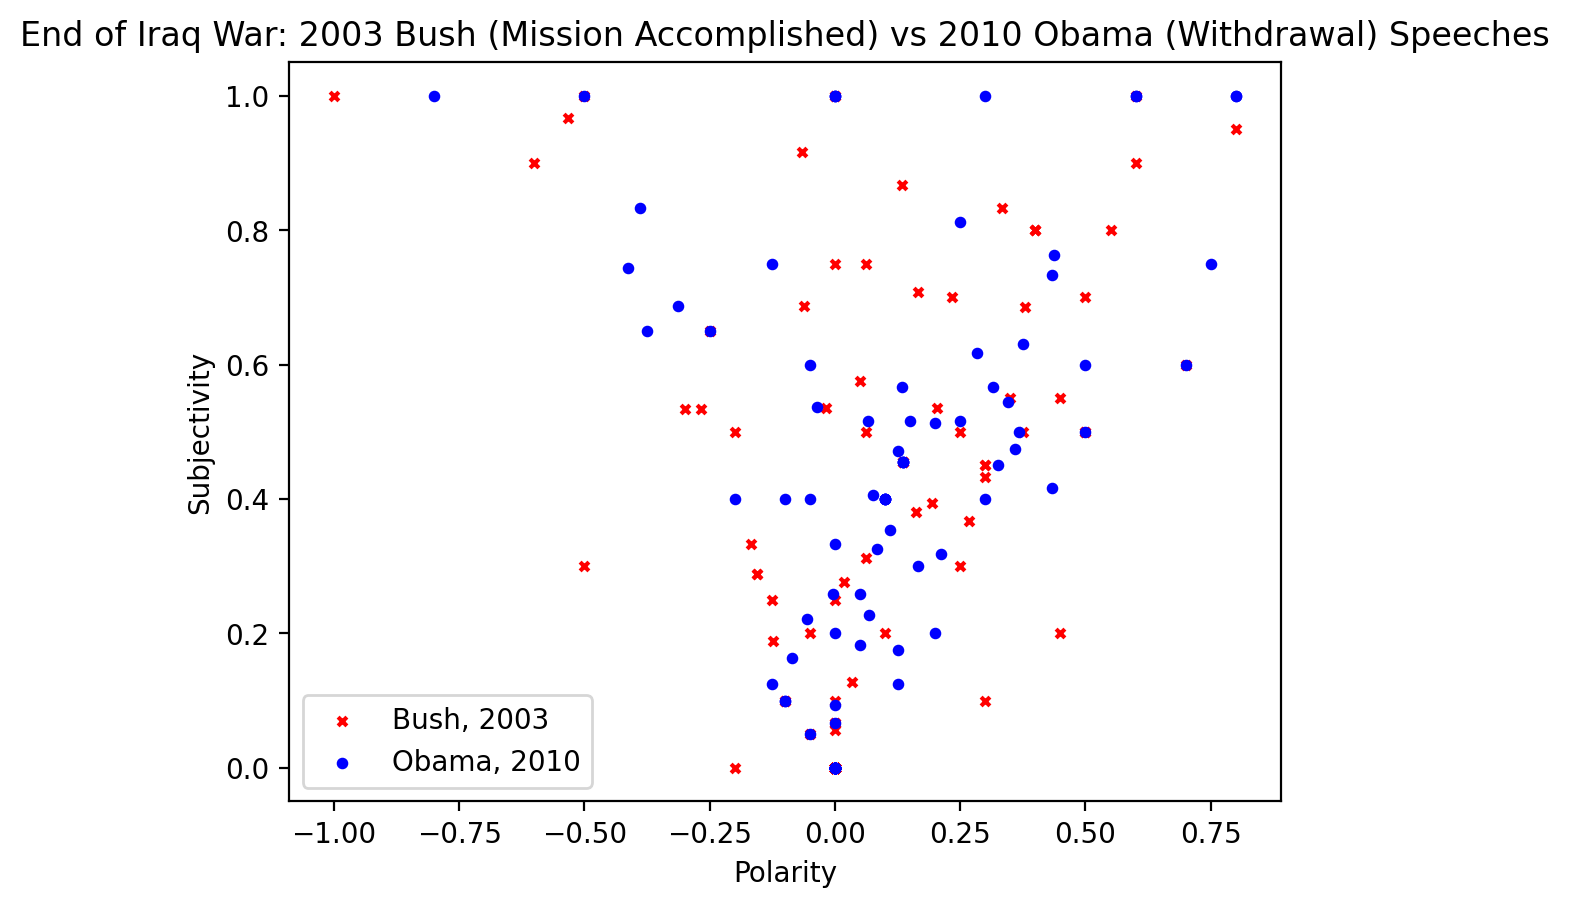

In [116]:
#imports
import matplotlib.pyplot as plt
import matplotlib as mpl

#change mpl style to classic
mpl.style.use('default')

#declare variables to make plotting easier
x1 = df['polarity']
y1 = df['subjectivity']
x2 = df['polarity2']
y2 = df['subjectivity2']

#plot points
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1, s=10, c='r', marker="x", label='Bush, 2003')
ax1.scatter(x2,y2, s=10, c='b', marker="o", label='Obama, 2010')

#title and legend
plt.title("End of Iraq War: 2003 Bush (Mission Accomplished) vs 2010 Obama (Withdrawal) Speeches")
plt.legend(loc='lower left')

#show labels
ax1.set_ylabel('Subjectivity')
ax1.set_xlabel('Polarity')

#shows the plot
plt.show()


## Key Statistics

In [76]:
#R squared for both demonstrate that subjectivity decreases when polarity increases
BushR2 = r2_score(df['polarity'], df['subjectivity'])
ObamaR2 = r2_score(df_sent2['polarity2'], df_sent2['subjectivity2'])

In [77]:
#R squared for Bush's polarity vs subjectivity shows a higher absolute value of correlation
#meaning, his speech became more subjective as it became more polarizing in comparison to Obama's speech
BushR2

-2.2115819810313333

In [78]:
#R squared for Obama's polarity vs subjectivity shows a lower absolute value of correlation
ObamaR2

-2.1842209897975517

In [82]:
#Bush's speech was slightly less polarizing, on average
df['polarity'].mean()

0.052121283135062674

In [81]:
#Obama's speech was slightly more polarizing, on average
df['polarity2'].mean()

0.08229255740829816

In [83]:
#Bush's speech was slightly less subjective, on average
df['subjectivity'].mean()

0.2800936388633239

In [85]:
#Obama's speech was slightly more subjective, on average
df['subjectivity2'].mean()

0.3473787060419005

In [100]:
#Overall sentiment for Bush's speech
blob.sentiment

Sentiment(polarity=0.10143851479985935, subjectivity=0.5121981216729116)

In [101]:
#Overall sentiment for Obama's speech
blob2.sentiment

Sentiment(polarity=0.12669191919191922, subjectivity=0.4540784950343776)

In [111]:
#Provides overall sentence count of Bush speech
len(blob.sentences)

127

In [112]:
#Provides overall sentence count of Obama speech
len(blob2.sentences)

108

In [89]:
#3 pt - Produce some basic statistics for the two sources 
#including overall sentence count

#Basic descriptive stats for Bush
BushDesc = df_sent.describe()
BushDesc

,polarity,subjectivity
count,127.000000,127.000000
mean,0.052121,0.280094
std,0.242199,0.331906
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.100000
75%,0.134848,0.516667
max,0.800000,1.000000


In [90]:
#Basic descriptive stats for Obama
ObamaDesc = df_sent2.describe()
ObamaDesc

,polarity2,subjectivity2
count,108.000000,108.000000
mean,0.082293,0.347379
std,0.247152,0.325691
min,-0.800000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.343824
75%,0.139773,0.550000
max,0.800000,1.000000


# My Analysis
I was not anticipating both speeches being so similar to one another in terms of subjectivity and polarity.  Both speeches were patriotic, although Bush's speech was more upbeat given his presumed victory in Iraq (which clearly wasn't the case long-term).  Both were not that polarizing, but in large part what was most polarizing was also the most subjective.  It is interesting to compare the two speeches given that public sentiment largely portrays Obama and Bush on opposite sides of the political spectrum; I had presumed that this would reflect greatly in terms of polarity.  I am sure that had I compared Bush's mission accomplished speech with Trump's Afghanistan withdrawal treaty speech, there would have been a much larger difference in polarity given differences in communication patterns.  This analysis really highlights the fact that polarization was not nearly as pronounced 1 and 2 decades ago as it is today given the large amount of overlap between speech sentiment.